# Clase 1: ejercicios prácticos resueltos

In [91]:
!pip install markdown
!pip install arrow

Looking in indexes: https://nexus.corp.indeed.com/repository/pypi/simple
Looking in indexes: https://nexus.corp.indeed.com/repository/pypi/simple


In [92]:
from IPython.core.display import display, HTML
import pandas as pd
import matplotlib
import arrow
import markdown
%matplotlib inline

matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12, 8]

## Ejercicio 1: API de Series de Tiempo de Argentina 

* Genera una tabla y grafica la evolucion de los tipos de cambio ARS/USD de todas las entidades financieras (canal electronico, venta, 15hs).

In [93]:
BASE_SERIES_API = 'https://apis.datos.gob.ar/series/api/series/?ids={ids}&last=5000&format=csv'

tcs_api = BASE_SERIES_API.format(
    ids=",".join([
        'tc_usd_galicia_ev15',
        'tc_usd_supervielle_ev15',
        'tc_usd_itau_ev15',
        'tc_usd_macro_ev15',
        'tc_usd_piano_ev15',
        'tc_usd_credicoop_ev15',
        'tc_usd_bbva_ev15',
        'tc_usd_bna_ev15',
        'tc_usd_ibcambio_ev15',
        'tc_usd_patagonia_ev15',
        'tc_usd_hsbc_ev15',
        'tc_usd_brubank_ev15',
        'tc_usd_bullmarket_ev15',
        'tc_usd_santander_ev15',
        'tc_usd_hipotecario_ev15',
        'tc_usd_balanz_ev15',
    ])
)

print(tcs_api)

tcs = pd.read_csv(tcs_api)

https://apis.datos.gob.ar/series/api/series/?ids=tc_usd_galicia_ev15,tc_usd_supervielle_ev15,tc_usd_itau_ev15,tc_usd_macro_ev15,tc_usd_piano_ev15,tc_usd_credicoop_ev15,tc_usd_bbva_ev15,tc_usd_bna_ev15,tc_usd_ibcambio_ev15,tc_usd_patagonia_ev15,tc_usd_hsbc_ev15,tc_usd_brubank_ev15,tc_usd_bullmarket_ev15,tc_usd_santander_ev15,tc_usd_hipotecario_ev15,tc_usd_balanz_ev15&last=5000&format=csv


In [94]:
tcs['indice_tiempo'] = pd.to_datetime(tcs.indice_tiempo)
tcs = tcs.set_index('indice_tiempo')
tcs

,tc_ars_dolar_galicia_electronico_venta_15hs,tc_ars_dolar_supervielle_electronico_venta_15hs,tc_ars_dolar_itau_electronico_venta_15hs,tc_ars_dolar_macro_electronico_venta_15hs,tc_ars_dolar_piano_electronico_venta_15hs,tc_ars_dolar_credicoop_electronico_venta_15hs,tc_ars_dolar_bbva_electronico_venta_15hs,tc_ars_dolar_bna_electronico_venta_15hs,tc_ars_dolar_ibcambio_electronico_venta_15hs,tc_ars_dolar_patagonia_electronico_venta_15hs,tc_ars_dolar_hsbc_electronico_venta_15hs,tc_ars_dolar_brubank_electronico_venta_15hs,tc_ars_dolar_bullmarket_electronico_venta_15hs,tc_ars_dolar_santander_electronico_venta_15hs,tc_ars_dolar_hipotecario_electronico_venta_15hs,tc_ars_dolar_balanz_electronico_venta_15hs
indice_tiempo,,,,,,,,,,,,,,,,
2017-01-02,16.20,NaN,16.20,NaN,NaN,16.07,16.15,NaN,NaN,16.15,16.10,NaN,NaN,16.20,NaN,NaN
2017-01-03,16.15,NaN,16.15,NaN,NaN,16.07,16.15,NaN,NaN,NaN,16.10,NaN,NaN,16.20,NaN,NaN
2017-01-04,NaN,NaN,16.35,NaN,NaN,16.27,16.30,NaN,NaN,16.30,16.25,NaN,NaN,16.40,NaN,NaN
2017-01-05,16.25,NaN,16.25,NaN,NaN,16.17,16.15,NaN,NaN,16.15,16.15,NaN,NaN,16.25,NaN,NaN
2017-01-06,16.05,NaN,16.10,NaN,NaN,16.07,16.00,NaN,NaN,16.15,16.05,NaN,NaN,16.05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-10,79.25,79.00,79.10,79.5,78.338,78.95,NaN,78.95,NaN,79.50,79.15,78.75,NaN,79.00,NaN,NaN
2020-09-11,79.50,79.00,79.15,79.5,78.631,78.95,NaN,78.95,NaN,79.50,79.25,78.95,NaN,79.00,NaN,NaN
2020-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


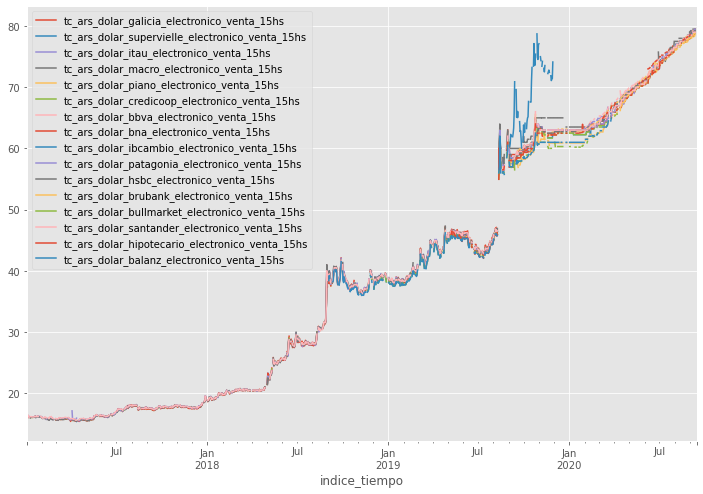

In [95]:
tcs.plot()

* Genera un reporte automatico en HTML que diga las ultimas temperaturas diarias y el promedio de los ultimos 30 dias, para 3 ciudades de Argentina

In [96]:
temperaturas_api = BASE_SERIES_API.format(
    ids=",".join([
        'temp_max_sarc',
        'temp_max_sane',
        'temp_max_saar',
    ])
)

print(temperaturas_api)

temperaturas = pd.read_csv(temperaturas_api)

https://apis.datos.gob.ar/series/api/series/?ids=temp_max_sarc,temp_max_sane,temp_max_saar&last=5000&format=csv


In [97]:
temperaturas['indice_tiempo'] = pd.to_datetime(temperaturas.indice_tiempo)
temperaturas = temperaturas.set_index('indice_tiempo')
temperaturas

,temperatura_maxima_sarc,temperatura_maxima_sane,temperatura_maxima_saar
indice_tiempo,,,
2018-11-17,29.8,37.2,26.0
2018-11-18,26.0,32.2,24.8
2018-11-19,26.2,30.7,27.8
2018-11-20,30.7,33.7,29.5
2018-11-21,32.5,35.2,33.5
...,...,...,...
2020-01-29,35.0,32.0,25.8
2020-01-30,27.7,NaN,NaN
2020-01-31,30.0,34.6,29.6


In [98]:
# como hay algunos dias sin valores, hay que especificar cual es la 
# cantidad minima de periodos aceptable para hacer el promedio de 30 dias
temperaturas_30d = temperaturas.rolling(30, min_periods=25).mean()
temperaturas_30d

,temperatura_maxima_sarc,temperatura_maxima_sane,temperatura_maxima_saar
indice_tiempo,,,
2018-11-17,NaN,NaN,NaN
2018-11-18,NaN,NaN,NaN
2018-11-19,NaN,NaN,NaN
2018-11-20,NaN,NaN,NaN
2018-11-21,NaN,NaN,NaN
...,...,...,...
2020-01-29,33.020000,35.303333,30.680000
2020-01-30,32.876667,35.279310,30.693103
2020-01-31,32.810000,35.251724,30.734483


In [99]:
fecha = arrow.get(temperaturas.index[-1]).format('YYYY-MM-DD')

corrientes_temp = temperaturas.loc[fecha, 'temperatura_maxima_sarc']
santiago_temp = temperaturas.loc[fecha, 'temperatura_maxima_sane']
rosario_temp = temperaturas.loc[fecha, 'temperatura_maxima_saar']

corrientes_temp_30d = temperaturas_30d.loc[fecha, 'temperatura_maxima_sarc']
santiago_temp_30d = temperaturas_30d.loc[fecha, 'temperatura_maxima_sane']
rosario_temp_30d = temperaturas_30d.loc[fecha, 'temperatura_maxima_saar']

In [100]:
reporte = f"""
Temperaturas maximas registradas al dia de {fecha} y 
promedio de maximas de los 30 dias anteriores.

* Corrientes: {corrientes_temp} (promedio 30d: {corrientes_temp_30d:.1f})
* Santiago del Estero: {santiago_temp} (promedio 30d: {santiago_temp_30d:.1f})
* Rosario: {rosario_temp} (promedio 30d: {rosario_temp_30d:.1f})
"""

In [101]:
html = markdown.markdown(reporte)
display(HTML(html))

* Grafica la relacion entre las siguientes variables:
    - Variacion mensual de la inflacion nucleo y variacion mensual de tipo de cambio
    - Variacion mensual de la inflacion nucleo y variacion mensual de tipo de cambio de hace 6 meses (ie. hay que aplicar un rezago de 6 meses)

## Ejercicio 2: API de Quandl

* Grafica las tasas de interes de los bonos de Estados Unidos, a partir del dataset de FRED disponible en Quandl

## Ejercicio 3: API de Banco Mundial

* Grafica la evolucion de las emisiones per capita de CO2 para algunos paises de Sudamérica desde 1960 (o el primer año con datos).